# Credit Card Lead Classification

### Contents:
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Choosing the Best Model
7. Creating Submission File


## 1) Import Necessary Libraries
First off, we need to import several Python libraries such as numpy, pandas, matplotlib and seaborn.

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2) Read in and Explore the Data 
It's time to read in our training and testing data using `pd.read_csv`, and take a first look at the training data using the `describe()` function.

In [2]:
#import train and test CSV files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#take a look at the training data
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


## 3) Data Analysis
We're going to consider the features in the dataset and how complete they are. 

In [3]:
#get a list of the features within the dataset
print(train.columns)

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')


In [4]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
207748,D85LKZVU,Female,84,RG283,Other,X2,38,No,894823,No,0
21583,KDLANENT,Female,48,RG267,Salaried,X3,45,NaN,352849,No,1
147787,MJGMHZZX,Female,43,RG283,Self_Employed,X3,93,No,1147521,Yes,0
63213,7Q8IDUQC,Male,27,RG283,Other,X1,20,No,1099799,Yes,0
126341,3MMBEA4Y,Female,29,RG284,Other,X1,19,No,1315286,Yes,1


In [5]:
#see a summary of the training dataset
train.describe(include = "all")

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,QQDPVYC4,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [6]:
#check for any other unusable values
print(pd.isnull(train).sum())

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64


### Some Observations:
#### There are a total of 245725 ID's in our training set. The Credit_Product feature is missing approximately 12% of its values. I'm guessing that this feature is pretty important to Is_Lead, so we should probably attempt to fill these gaps. I think MODE is best to fill Nan values in Categorical values.

We can see that except for the above mentioned missing values, no NaN values exist.

## 4) Data Visualization
It's time to visualize our data so we can see whether our predictions were accurate! 

<AxesSubplot:xlabel='Gender', ylabel='Is_Lead'>

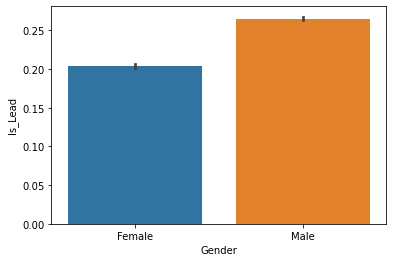

In [7]:
#draw a bar plot of survival by sex
sns.barplot(x="Gender", y="Is_Lead", data=train)

As predicted, Males have a much higher chance of Is_Lead than Females.

<AxesSubplot:xlabel='Is_Lead', ylabel='Region_Code'>

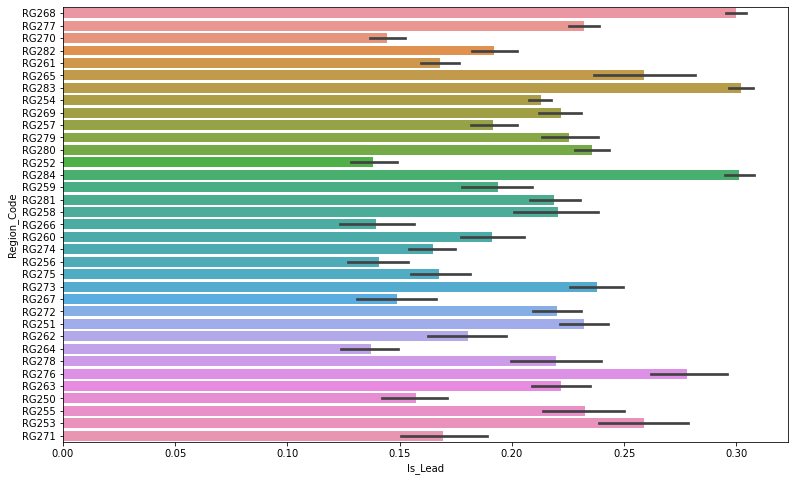

In [8]:
plt.figure(figsize=(13,8))
sns.barplot(x="Is_Lead",y="Region_Code", data=train)

In [9]:
train['Occupation'].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

% of Self_Employed: 27.596495053823126
% of Salaried: 15.966888429005957
% of Other: 24.495176207373206
% of Entrepreneur: 66.06674165729284


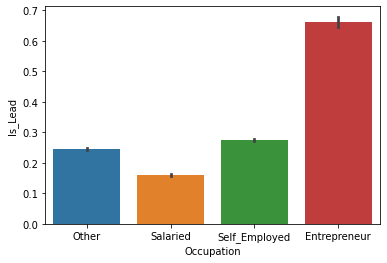

In [10]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Occupation", y="Is_Lead", data=train)

print("% of Self_Employed:", train["Is_Lead"][train["Occupation"] =='Self_Employed' ].value_counts(normalize = True)[1]*100)
print("% of Salaried:", train["Is_Lead"][train["Occupation"] == 'Salaried'].value_counts(normalize = True)[1]*100)
print("% of Other:", train["Is_Lead"][train["Occupation"] == 'Other'].value_counts(normalize = True)[1]*100)
print("% of Entrepreneur:", train["Is_Lead"][train["Occupation"] == 'Entrepreneur'].value_counts(normalize = True)[1]*100)

In [11]:
train['Is_Active'].value_counts()

No     150290
Yes     95435
Name: Is_Active, dtype: int64

In [12]:
train['Channel_Code'].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

Percentage of X1 : 9.142096839507124
Percentage of X2 : 32.78947523846086
Percentage of X3 : 36.702468273372915
Percentage of X4 : 24.780032321781288


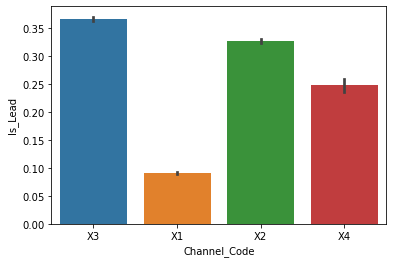

In [13]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="Channel_Code", y="Is_Lead", data=train)

print("Percentage of X1 :",train["Is_Lead"][train["Channel_Code"] =='X1'].value_counts(normalize = True)[1]*100)
print("Percentage of X2 :",train["Is_Lead"][train["Channel_Code"] == 'X2'].value_counts(normalize = True)[1]*100)
print("Percentage of X3 :",train["Is_Lead"][train["Channel_Code"] == 'X3'].value_counts(normalize = True)[1]*100)
print("Percentage of X4 :",train["Is_Lead"][train["Channel_Code"] == 'X4'].value_counts(normalize = True)[1]*100)

Percentage of Is_Active = NO : 20.81509082440615
Percentage of Is_Active = Yes: 28.296746476659507


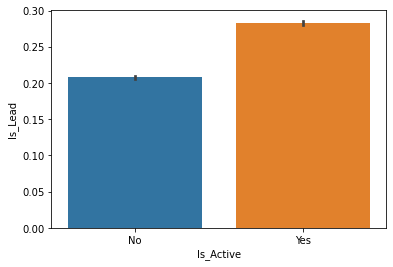

In [14]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="Is_Active", y="Is_Lead", data=train)

print("Percentage of Is_Active = NO :", train["Is_Lead"][train["Is_Active"] =='No'].value_counts(normalize = True)[1]*100)
print("Percentage of Is_Active = Yes:", train["Is_Lead"][train["Is_Active"] == 'Yes'].value_counts(normalize = True)[1]*100)

In [15]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

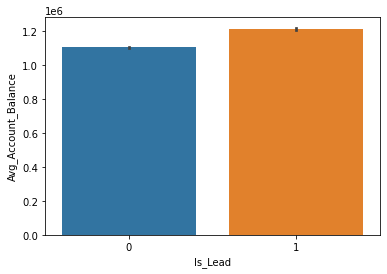

In [16]:
#draw a bar plot for Parch vs. survival
sns.barplot(y="Avg_Account_Balance", x="Is_Lead", data=train)
plt.show()

## 5) Cleaning Data
Time to clean our data to account for missing values and unnecessary information!

### Looking at the Test Data
Let's see how our test data looks!

In [17]:
#test.describe(include="all")

In [18]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [19]:
train.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,QQDPVYC4,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


### Gender Feature

In [20]:
train['Gender'].replace({"Male": 0, "Female":1}, inplace=True)
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,1,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,1,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,0,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,1,30,RG282,Salaried,X1,33,No,886787,No,0


### Credit_Product Feature

In [21]:
train['Credit_Product'].replace({"Yes": 0, "No":1}, inplace=True)
train['Credit_Product'].fillna(train['Credit_Product'].mode().values[0], inplace=True)
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,RG268,Other,X3,43,1.0,1045696,No,0
1,IDD62UNG,1,30,RG277,Salaried,X1,32,1.0,581988,No,0
2,HD3DSEMC,1,56,RG268,Self_Employed,X3,26,1.0,1484315,Yes,0
3,BF3NC7KV,0,34,RG270,Salaried,X1,19,1.0,470454,No,0
4,TEASRWXV,1,30,RG282,Salaried,X1,33,1.0,886787,No,0


In [22]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

### Avg_Account_Balance Feature

In [23]:
train['Avg_Account_Balance']=train['Avg_Account_Balance']/100000
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,RG268,Other,X3,43,1.0,10.45696,No,0
1,IDD62UNG,1,30,RG277,Salaried,X1,32,1.0,5.81988,No,0
2,HD3DSEMC,1,56,RG268,Self_Employed,X3,26,1.0,14.84315,Yes,0
3,BF3NC7KV,0,34,RG270,Salaried,X1,19,1.0,4.70454,No,0
4,TEASRWXV,1,30,RG282,Salaried,X1,33,1.0,8.86787,No,0


### Is_Active Feature

In [24]:
train['Is_Active'].replace({"Yes": 0, "No":1}, inplace=True)

### Region_Code Feature

In [25]:
dummies1=pd.get_dummies(train.Region_Code)

### Occupation Feature

In [26]:
dummies2=pd.get_dummies(train.Occupation)
dummies2.head()

,Entrepreneur,Other,Salaried,Self_Employed
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0


### Channel_Code Feature

In [27]:
dummies3=pd.get_dummies(train.Channel_Code)
dummies3.head()

,X1,X2,X3,X4
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0


In [29]:
df=pd.concat([train,dummies1, dummies2,dummies3],axis='columns')


In [30]:
df.drop(['ID','Occupation','Channel_Code','X1','Other','RG280','Region_Code'], axis = 'columns',inplace=True)

In [31]:
df.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,RG250,RG251,RG252,...,RG281,RG282,RG283,RG284,Entrepreneur,Salaried,Self_Employed,X2,X3,X4
0,1,73,43,1.0,10.45696,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,30,32,1.0,5.81988,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,56,26,1.0,14.84315,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,34,19,1.0,4.70454,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,30,33,1.0,8.86787,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


## 6) Choosing the Best Model

In [32]:
df.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,RG250,RG251,RG252,...,RG281,RG282,RG283,RG284,Entrepreneur,Salaried,Self_Employed,X2,X3,X4
0,1,73,43,1.0,10.45696,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,30,32,1.0,5.81988,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,56,26,1.0,14.84315,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,34,19,1.0,4.70454,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,30,33,1.0,8.86787,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Splitting the Training Data
We will use part of our training data (22% in this case) to test the accuracy of our different models.

In [33]:
from sklearn.model_selection import train_test_split

predictors = df.drop(['Is_Lead'], axis=1)
target = df["Is_Lead"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

### Testing Different Models
* Gaussian Naive Bayes
* Logistic Regression
* Support Vector Machines
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors
* Stochastic Gradient Descent

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

In [34]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)
print(sgd.score(x_val,y_val))

44.04
0.440362560118387


In [35]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

58.77


In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

77.72


In [37]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

75.34


In [38]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

71.03


In [39]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

77.81


# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

In [40]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree', 'Stochastic Gradient Descent'],
    'Score': [acc_knn, acc_logreg, acc_randomforest, acc_gaussian, acc_decisiontree,acc_sgd]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,77.81
1,Logistic Regression,77.72
0,KNN,75.34
4,Decision Tree,71.03
3,Naive Bayes,58.77
5,Stochastic Gradient Descent,44.04


In [45]:
data=pd.read_csv("prediction.csv")
data.head()

,ID,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,RG250,RG251,RG252,...,RG281,RG282,RG283,RG284,Entrepreneur,Salaried,Self_Employed,X2,X3,X4
0,VBENBARO,0,29,25,0,7.42366,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCMEWNKY,0,43,49,1,9.25537,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,VK3KGA9M,0,31,14,1,2.15949,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,TT8RPZVC,0,29,33,1,8.68070,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SHQZEYTZ,1,29,19,1,6.57087,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
pred=data.drop(['ID'],axis=1)

In [64]:
#change model
dy=sgd.predict(pred)

In [65]:
col=['Is_Lead']
dy1 = pd.DataFrame(data = dy,columns = col)
id=data['ID']
prediction=pd.concat([id,dy1],axis='columns')


In [66]:
#change output file name
prediction.to_csv('Output1.csv',index=False)